# CSE 4334 Assignment 1
## Polynomial Regression
### By Chesley Cecil
### ID 1001611979

Part a: generating 20 data points using sin(2 * pi * x) + N, then making half into training values and half into test values

Scatter plot of the full generated data:


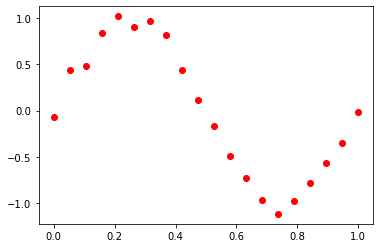

In [1]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from pandas import DataFrame


#Creates a list of the resulting y-values from the x-values and weights
#[X1, X2, ..., Xn] -> [Y1, Y2, ..., Yn]
def compute_function(weights, x_values):
    #The sum part adds together the individual parts of the equation
    #[W0 * Xi^n, W1 * Xi^(n - 1), ...] -> W0 * Xi^n + W1 * Xi^(n - 1) + ... -> Yi
    #to create elements of the list [Y1, Y2, ...]
    #The zip part merges together the weights and x value as a list of tuples [(W0, Xi^n), (W1, Xi^(n - 1), ...)]
    #then multiplies the elements of the tuples together to create the individual parts of the equation
    #[W0, W1, ...] [Xi^n, Xi^(n - 1), ...] -> [(W0, Xi^n), (W1, Xi^(n - 1), ...)] -> [W0 * Xi^n, W1 * Xi^(n - 1), ...]
    return [sum([w * v for w, v in 
            zip(weights, [value ** i for i in range(len(weights) - 1, -1, -1)])
            ]) for value in x_values]


#Calculates the mean square error as root(sum([actual - expected]^2))/N
def mean_square_error(expected, actual):
    return math.sqrt(sum([math.pow(x - y, 2.0) for x, y in zip(expected, actual)])/len(expected))


#Generates a list of 20 uniformly distributed values from 0 to 1
x_values = list(np.array(np.linspace(0, 1, 20)))

#Generates a list of 20 values using the function sin(2πx) + N
#Where N is a normal gaussian distribution
y_values = list(map(lambda x : math.sin(2 * math.pi * x) + np.random.normal(0, 0.1), x_values))

#Extracts the values at even indices from x_values
training_x_values = x_values[0::2]

#Extracts the values at even indices from y_values
training_y_values = y_values[0::2]

#Extracts the values at odd indices from x_values
test_x_values = x_values[1::2]

#Extracts the values at odd indices from y_values
test_y_values = y_values[1::2]

print("Scatter plot of the full generated data:")

plt.plot(x_values, y_values, "or")

Part b: Finding the weights for the polynomials of degree 0, 1, 3, and 9

In [2]:
#Creates a list of weights from degree 0 to degree 9 polynomials that fit the training data
weights = [np.polyfit(training_x_values, training_y_values, i) for i in range(10)]

print("Degree 9 weights:")

print(weights[9])

Degree 9 weights:
[-1.62651738e+02 -2.04562011e+03  8.23296033e+03 -1.18262518e+04
  8.27789584e+03 -2.87366765e+03  4.00684832e+02 -9.90796018e+00
  4.25067700e+00 -6.50189293e-02]


Part c: Displaying the weights in a table

In [3]:
#Creates a list of the degrees whose weights will be examined
indices = [0, 1, 3, 9]
    
#Create the table where rows are Wi, and cols are the degree
#The first part extracts the elements of weights that correspond to the values in indices
#The second part creates the row lables as "M = i", where i is an element of indicies
#The third part creates the column labels as "W*i", where i is in the range 0..indices[-1]
#The fourth part replaces all NaN values with empty strings so they don't show up in the table
#The fifth part transposes the dataframe to make the columns be the degrees and the rows be the weights
df = DataFrame([weights[i] for i in indices], 
               index=list(map(lambda x: "M = " + str(x), indices)), 
               columns=["W*" + str(i) for i in range(indices[-1] + 1)]).fillna("").T

#Displays the dataframe
df

,M = 0,M = 1,M = 3,M = 9
W*0,-0.0314253,-1.60247,23.3519,-162.652
W*1,,0.727639,-34.8296,-2045.62
W*2,,,11.8845,8232.96
W*3,,,-0.177494,-11826.3
W*4,,,,8277.9
W*5,,,,-2873.67
W*6,,,,400.685
W*7,,,,-9.90796
W*8,,,,4.25068
W*9,,,,-0.0650189


Part d: Drawing charts of fit data

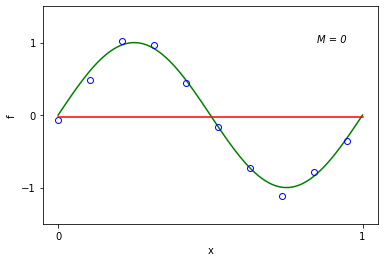

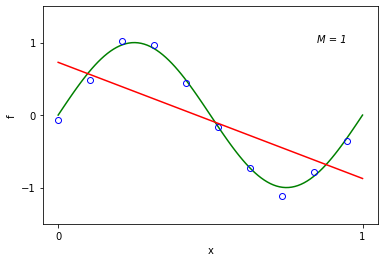

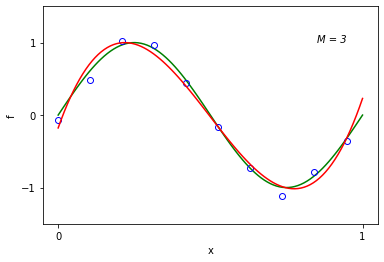

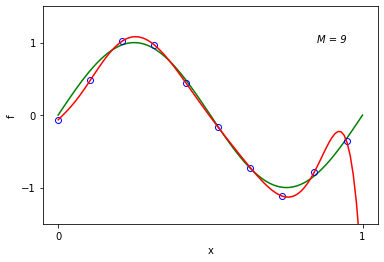

In [4]:
#Generates a list of 100 uniformly distributed values from 0 to 1
full_x_values = list(np.array(np.linspace(0, 1, 100)))

#Generates y values for a sine wave
sine_y_values = list(map(lambda x : math.sin(2 * math.pi * x), full_x_values))

#Runs the graphing code for the specified degrees
for i in indices:
    #Sets specific aspects of the graph
    plt.ylim(-1.5, 1.5)
    plt.yticks([-1, 0, 1])
    plt.ylabel("f")
    plt.xticks([0, 1])
    plt.xlabel("x")
    plt.text(0.85, 1, "M = " + str(i), style="italic")

    #Graphs the sine wave, the training points, and the calculated polynomial on the same image
    plt.plot(full_x_values, sine_y_values, "g",
         training_x_values, training_y_values, "bo", 
         full_x_values, compute_function(weights[i], full_x_values), "r", fillstyle="none")
    
    #Allows for the next call to plot to be graphed in another image
    plt.show()

Part e: Drawing train VS test error based on degree

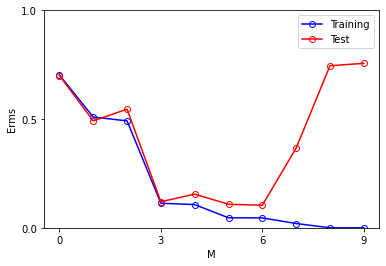

In [5]:
#Creates a list of the training RMSE
train_error = [mean_square_error(training_y_values, compute_function(weights[i], training_x_values)) for i in range(10)]

#Creates a list of the test RMSE
test_error = [mean_square_error(test_y_values, compute_function(weights[i], test_x_values)) for i in range(10)]

#Sets specific aspects of the graph
plt.ylim(0, 1)
plt.yticks([0, 0.5, 1])
plt.ylabel("Erms")
plt.xticks([0, 3, 6, 9])
plt.xlabel("M")

#Graphs the training and testing error data individually so labels can be used for the legend 
train = plt.plot(range(10), train_error, "b", label="Training", marker="o", fillstyle="none")
test = plt.plot(range(10), test_error, "r", label="Test", marker="o", fillstyle="none")

plt.legend()

Part f: Generating 100 data points, fitting a 9th degreee polynomial with them, then drawing the fit data

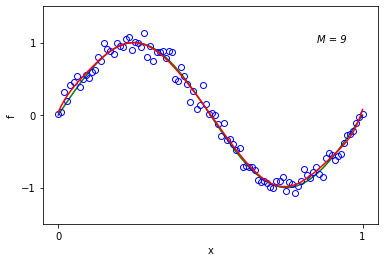

In [6]:
#Generates a list of 100 values using the function sin(2πx) + N
#Where N is a normal gaussian distribution
full_y_values = list(map(lambda x : math.sin(2 * math.pi * x) + np.random.normal(0, 0.1), full_x_values))

#Gets the weights from training a 9th degree polynomial on 100 data points
weights_hundred = np.polyfit(full_x_values, full_y_values, 9)

#Sets specific aspects of the graph
plt.ylim(-1.5, 1.5)
plt.yticks([-1, 0, 1])
plt.ylabel("f")
plt.xticks([0, 1])
plt.xlabel("x")
plt.text(0.85, 1, "M = 9", style="italic")

#Graphs the sine wave, the training points, and the calculated polynomial on the same image
plt.plot(full_x_values, sine_y_values, "g",
        full_x_values, full_y_values, "bo", 
        full_x_values, compute_function(weights_hundred, full_x_values), "r", fillstyle="none")

Part g: Using lambda regularization

In [7]:
#Formats the training values to work with a 9th degree polynomial
formatted_training = PolynomialFeatures(degree=9).fit_transform(np.array(training_x_values).reshape(-1, 1))

#Fits the ridges to the training data
ridges = [Ridge(alpha=1/(10 ** i)).fit(formatted_training, training_y_values) for i in range(6)]

#Finds the y-values for the given model
ridge_values = [rid.predict(formatted_training) for rid in ridges]

print("Calculated values for when lambda is 1/10:")

print(ridge_values[1])

Calculated values for when lambda is 1/10:
[ 0.59254888  0.5454156   0.46170092  0.33314816  0.15218072 -0.08373006
 -0.36197897 -0.63439788 -0.77970218 -0.5394377 ]


Part h: Drawing fit data for multiple lambda values

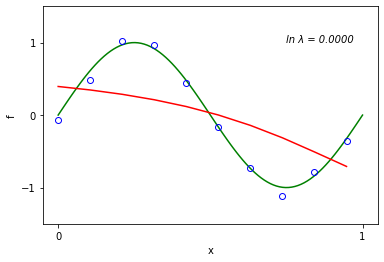

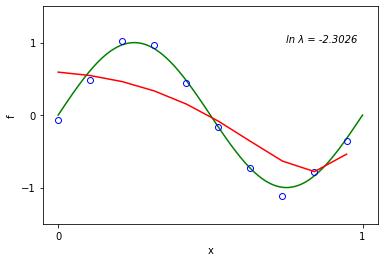

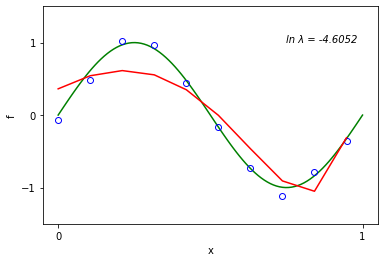

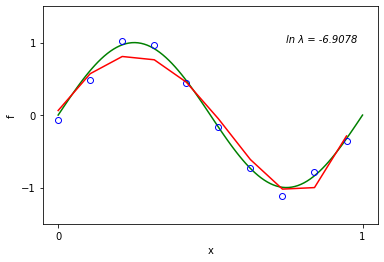

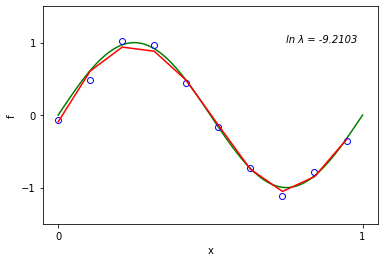

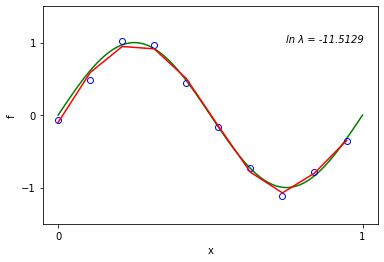

In [8]:
for i in range(len(ridge_values)):
    #Sets specific aspects of the graph
    plt.ylim(-1.5, 1.5)
    plt.yticks([-1, 0, 1])
    plt.ylabel("f")
    plt.xticks([0, 1])
    plt.xlabel("x")
    plt.text(0.75, 1, "ln λ = {value:.4f}".format(value=math.log(1/(10 ** i))), style="italic")

    #Graphs the sine wave, the training points, and the calculated polynomial on the same image
    plt.plot(full_x_values, sine_y_values, "g",
            training_x_values, training_y_values, "bo", 
            training_x_values, ridge_values[i], "r", fillstyle="none")

    #Allows for the next call to plot to be graphed in another image
    plt.show()

Part i: Drawing test and train error based on lambda

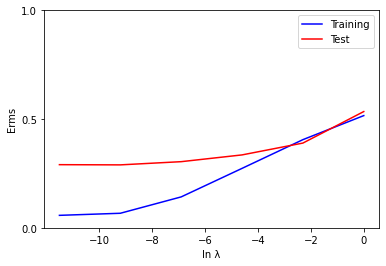

In [9]:
#Creates a list of the training RMSE
train_error = [mean_square_error(training_y_values, ridge_values[i]) for i in range(len(ridge_values))]

#Creates a list of the test RMSE
test_error = [mean_square_error(test_y_values, ridge_values[i]) for i in range(len(ridge_values))]

x_lab = [math.log(1/(10 ** i)) for i in range(6)]

#Sets specific aspects of the graph
plt.ylim(0, 1)
plt.yticks([0, 0.5, 1])
plt.ylabel("Erms")
plt.xticks([-10, -8, -6, -4, -2, 0])
plt.xlabel("ln λ")

#Graphs the training and testing error data individually so labels can be used for the legend 
train = plt.plot(x_lab, train_error, "b", label="Training")
test = plt.plot(x_lab, test_error, "r", label="Test")

plt.legend()

Part j: Determining the model

Based on the error from the non-regularized portion, the model is a cubic function